In [9]:
#import library
import matplotlib.pyplot as plt
#%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np
import cv2

Shape citra 1 :  (1600, 1200)
Shape citra 1 :  (1024, 768)


Text(0.5, 1.0, 'Citra 2')

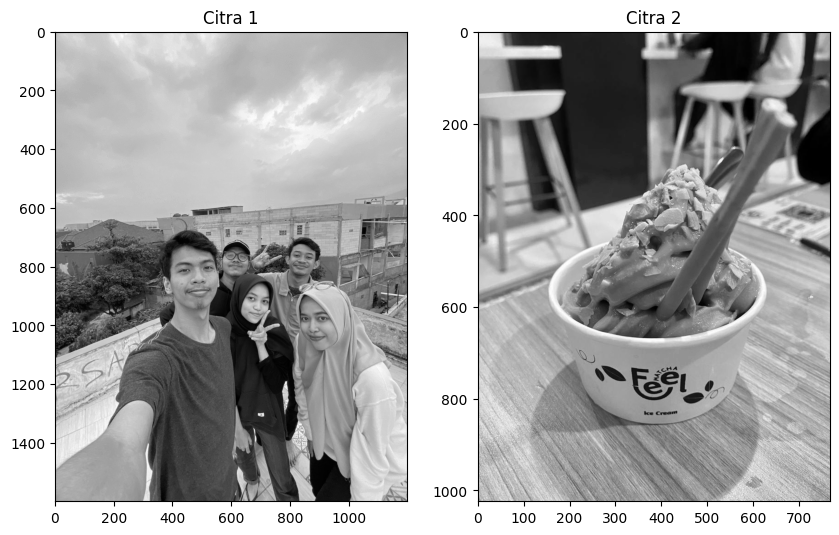

In [10]:
#membaca citra dengan nama file "kita.jpeg" menggunakan fungsi imread()
citra1 = imread(fname="kita.jpg")
#konversi citra menjadi citra skala abu-abu 
citra1 = cv2.cvtColor(citra1, cv2.COLOR_RGB2GRAY)
#membaca citra dengan nama file "kita.jpeg" menggunakan fungsi imread()
citra2 = imread(fname="matcha.jpg")
#konversi citra menjadi citra skala abu-abu 
citra2 = cv2.cvtColor(citra2, cv2.COLOR_RGB2GRAY)

#mencetak dimensi citra
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

# Membuat figure subplot  dengan ukuran 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

#menampilkna citra 1 & citra 2
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [11]:
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

In [12]:
#membuat salinan dari citra citra1 dan citra2 
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()
#mengambil dimensi baris (m1) dan dimensi kolom (n1) dari copyCitra1
m1, n1 = copyCitra1.shape
#membuat matriks kosong dengan ukuran m1 baris dan n1 kolom
output1 = np.empty([m1, n1])

#mengambil dimensi baris (m2) dan dimensi kolom (n2) dari copyCitra2
m2, n2 = copyCitra2.shape
#membuat matriks kosong dengan ukuran m2 baris dan n2 kolom
output2 = np.empty([m2, n2])

#mencetak dimensi citra copyCitra1 dan dimensi citra output output1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)
#mencetak nilai m1 dan n1 untuk memberikan informasi tentang jumlah baris dan jumlah kolom secara terpisah
print('m1 : ', m1)
print('n1 : ', n1)
print()

#mencetak dimensi citra copyCitra2 dan dimensi citra output output2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 2 : ', output2.shape)
#mencetak nilai m1 dan n1 untuk memberikan informasi tentang jumlah baris dan jumlah kolom secara terpisah
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (1600, 1200)
Shape output citra 1 :  (1600, 1200)
m1 :  1600
n1 :  1200

Shape copy citra 2 :  (1024, 768)
Shape output citra 2 :  (1024, 768)
m2 :  1024
n2 :  768



In [13]:
#Melakukan iterasi pada setiap baris dari 0 hingga m1-1
for baris in range(0, m1-1):
    #Melakukan iterasi pada setiap kolom dari 0 hingga n1-1.
    for kolom in range(0, n1-1):
        
        #Menginisialisasi variabel a1 dengan nilai baris1 & variabel b1 dengan nilai kolom1
        a1 = baris
        b1 = kolom
        
        #Membentuk sebuah array numpy arr dengan elemen-elemen sekitar dari copyCitra2
        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])
        
        #Menghitung nilai minimum dan maksimum dari array 
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    
            
        #Jika nilai piksel pada posisi baris1, kolom1 dalam copyCitra2 lebih kecil dari minPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi minPiksel.  
        if copyCitra2[baris1, kolom1] < minPiksel :
            output2[baris1, kolom1] = minPiksel
        else :
            #Jika nilai piksel pada posisi baris1, kolom1 dalam copyCitra2 lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi maksPiksel.
            if copyCitra2[baris1, kolom1] > maksPiksel :
                output2[baris1, kolom1] = maksPiksel
            #Jika nilai piksel pada posisi baris1, kolom1 dalam copyCitra2 tidak lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi nilai piksel pada posisi baris1, kolom1 dalam copyCitra2.
            else :
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1]

IndexError: index 768 is out of bounds for axis 1 with size 768

In [ ]:
#Melakukan iterasi pada setiap baris dari 0 hingga m2-1
for baris1 in range(0, m2-1):
    #Melakukan iterasi pada setiap kolom dari 0 hingga n2-1.
    for kolom1 in range(0, n2-1):
        
        #Menginisialisasi variabel a1 dengan nilai baris1 & variabel b1 dengan nilai kolom1
        a1 = baris1
        b1 = kolom1
        
        #Membentuk sebuah array numpy arr dengan elemen-elemen sekitar dari copyCitra2
        arr = np.array([copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1, b1+1], \
            copyCitra2[a1, b1-1], copyCitra2[a1, b1+1], copyCitra2[a1+1, b1-1],  \
            copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]])
        
        #Menghitung nilai minimum dan maksimum dari array 
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);   
         
        #Jika nilai piksel pada posisi baris1, kolom1 dalam copyCitra2 lebih kecil dari minPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi minPiksel.  
        if copyCitra2[baris1, kolom1] < minPiksel :
            output2[baris1, kolom1] = minPiksel
        else :
            #Jika nilai piksel pada posisi baris1, kolom1 dalam copyCitra2 lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi maksPiksel.
            if copyCitra2[baris1, kolom1] > maksPiksel :
                output2[baris1, kolom1] = maksPiksel
            #Jika nilai piksel pada posisi baris1, kolom1 dalam copyCitra2 tidak lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi nilai piksel pada posisi baris1, kolom1 dalam copyCitra2.
            else :
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1]

Text(0.5, 1.0, 'Output Citra 2')

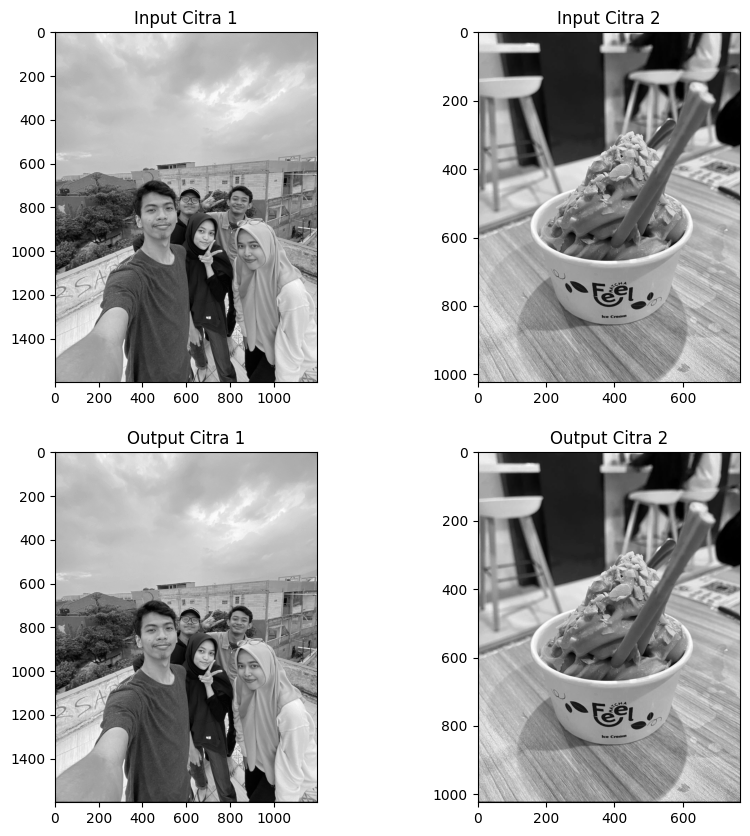

In [ ]:
# Membuat figure subplot  dengan ukuran 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()
#menampilkan hasil input citra 1
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")
#menampilkan hasil input citra 2
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 2")
#menampilkan hasil output citra 1
ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")
#menampilkan hasil output citra 1
ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")